## Semester 1 Project Submission

Please fill out:
* Student name: Sage Reagan, Neil Dilawari, Mahan Abbasian, Daniel Perez
* Instructor name: Charlie Rice, Lera Tsayukova



## Importing Python libraries

In [1]:
# In this cell we import the libraries needed for our analysis
# pandas for data frame manipulation and import
# sqlite3 for database connection, import and manipulation
# numpy for array-wise operations
# plt and sns for plotting data or data frames

import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing csv / tsv files

In this step, we will import data using the pandas library.
For that, there are two alternatives to import data:
1. bomDF = pd.read_csv("zippedData/bom.movie_gross.csv.gz", encoding="unicode_escape") --> for compressed files
2. bomDF = pd.read_csv("zippedData/bom.movie_gross.csv") --> for uncompressed (raw) files

In [2]:
# DataFrame from Box Office Mojo dataset
bomDF = pd.read_csv("zippedData/bom.movie_gross.csv.gz",encoding="unicode_escape")

In [3]:
print(bomDF.shape)

(3387, 5)


In [4]:
bomDF.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


## Importing SQL datset

Here, we import data from IMDB's SQLite database using sqlite3 library.

In [5]:
# DataFrame from IMDB dataset
conn = sqlite3.connect('zippedData/im.db')

In [6]:
movie_basicsDF = pd.read_sql("select * from movie_basics", con=conn)
movie_basicsDF.head(2)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [7]:
movie_ratingsDF = pd.read_sql("select * from movie_ratings", con=conn)
movie_ratingsDF.head(2)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


## Daniel's Section: Relationship between genre and average rates/revenues

### a. Does a movie's genre have an impact in mean average rates?

- Step 1. Merging "movie_basics" and "movie_ratings" SQL tables

In [8]:
q = pd.read_sql("""

SELECT *
FROM movie_basics b
INNER JOIN movie_ratings r
ON b.movie_id = r.movie_id

;
""", con=conn)
q.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119


- Step 2. Deleting rows with NAN values.

In [9]:
q['genres'].isna().sum()

804

In [10]:
q.dropna(subset=['genres'], inplace=True)

In [11]:
q['genres'].isna().sum()

0

- Step 3. Creating a subset with 50 samples, with the highest average ratings. Then, plot the results.

In [12]:
qmaxr = q.nlargest(50, 'averagerating')

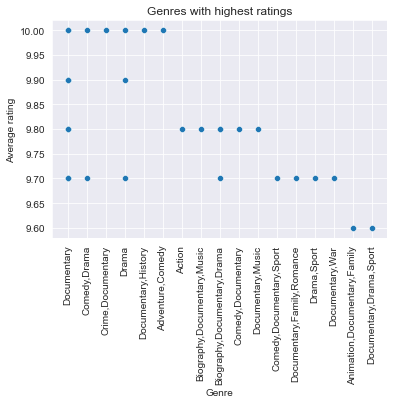

In [52]:
# Using seaborn library, we plot the 50 sample set from the dataset "q" with the highest average rating
# X axis represents all genres distributed within the 50 sample set.
# Y axis represents the average rating values.
sns.set_style("darkgrid")
sns.scatterplot(data=qmaxr, x="genres", y="averagerating", );
plt.xticks(rotation=90);
plt.xlabel("Genre");
plt.ylabel("Average rating");
plt.title("Genres with highest ratings");

- Step 4. Creating a subset with 50 samples, with the lowest average ratings. Then, plot the results.

In [14]:
qminr = q.nsmallest(50, 'averagerating')

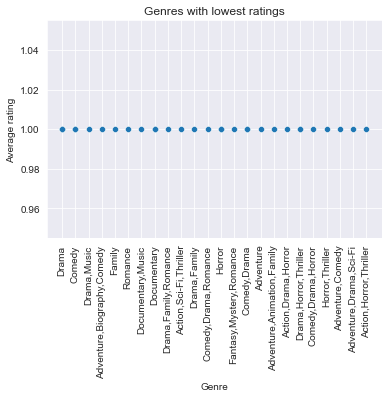

In [51]:
# Using seaborn library, we plot the 50 sample set from the dataset "q" with the lowest average rating.
# X axis represents all genres distributed within the 50 sample set.
# Y axis represents the average rating values.
sns.set_style("darkgrid")
sns.scatterplot(data=qminr, x="genres", y="averagerating");
plt.xticks(rotation=90);
plt.xlabel("Genre");
plt.ylabel("Average rating");
plt.title("Genres with lowest ratings");

#### What can be conclued for question a?
- For the highest average rating movies, DOCUMENTARY is the most common genre within our 50 samples. Moreover, it is combined with other genres like Drama, Music or Sport.
- For the lowest average rating movies, DRAMA is the most common genre within our 50 samples. Moreover, it is combined with other genres like Adventure, Horror or Thriller.

### b. Does a movie's genre have an impact in mean gross revenues?

- Step 1. Explore where to merge the dataframes (Where? Movie titles)

In [16]:
# df.head() gives by default the first 5 rows from the dataframe
# df.tail() gives by default the last 5 rows from the dataframe

In [17]:
q.head(2)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43


In [18]:
bomDF.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


- Step 2. Change name in bomDF['title'] column to bomDF['primary_title']

In [19]:
# For the dataframe merging to be successful, we must change the column name in any of the two dataframes.
bomDF.rename(columns = {'title':'primary_title'}, inplace = True)

In [20]:
bomDF.head(2)

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


- Step 3. Merge (type: inner) the "q" dataframe with "bomDF" dataframe on 'primary_title'

In [21]:
# the df.merge() function joins 2 dataframes by the inner type (default) on the column we want it to ('primary_title')
full_merge = bomDF.merge(q,on='primary_title')

In [22]:
full_merge.head()

,primary_title,studio,domestic_gross,foreign_gross,year,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",tt0892791,6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",tt1325004,5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",tt1228705,7.0,657690


- Step 4. Change full_merge['foreign_gross'] to float64, retire NaN values and then create a new column where domestic and foreign gross are summed.

In [23]:
print(full_merge['domestic_gross'].dtypes)
print(full_merge['foreign_gross'].dtypes)

float64
object


In [24]:
full_merge['foreign_gross'] = full_merge['foreign_gross'].replace(',','', regex=True)

In [25]:
full_merge['foreign_gross'] = full_merge['foreign_gross'].astype(float)

In [26]:
full_merge['foreign_gross'].isna().sum()

1195

In [27]:
full_merge.dropna(subset=['foreign_gross'], inplace=True)

In [28]:
full_merge['foreign_gross'].isna().sum()

0

In [29]:
print(full_merge['domestic_gross'].dtypes)
print(full_merge['foreign_gross'].dtypes)

float64
float64


In [30]:
full_merge['global_sum'] = full_merge['domestic_gross'] + full_merge['foreign_gross']

In [31]:
full_merge['global_sum'] = full_merge['global_sum'].astype(float)

In [32]:
full_merge.head(2)

,primary_title,studio,domestic_gross,foreign_gross,year,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,global_sum
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,8.3,682218,1.067000e+09
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,8.283000e+08


- Step 5. Create a subset with 50 samples, with the highest global gross (sum of domestic and foreign).

In [33]:
full_merge_max = full_merge.nlargest(70, 'global_sum')

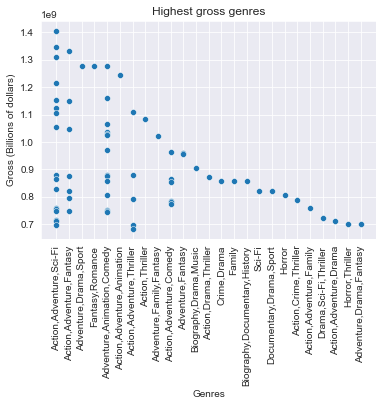

In [49]:
# Using seaborn library, we plot the 50 sample set from the dataset "full_merge" with the highest revenues
# X axis represents all genres distributed within the 50 sample set.
# Y axis represents the revenues values.
sns.set_style("darkgrid")
sns.scatterplot(data=full_merge_max, x="genres", y="global_sum");
plt.xticks(rotation=90);
plt.xlabel("Genres");
plt.ylabel("Gross (Billions of dollars)");
plt.title("Highest gross genres");

- Step 6. Create a subset with 50 samples, with the lowest global gross (sum of domestic and foreign).

In [35]:
full_merge_min = full_merge.nsmallest(70, 'global_sum')

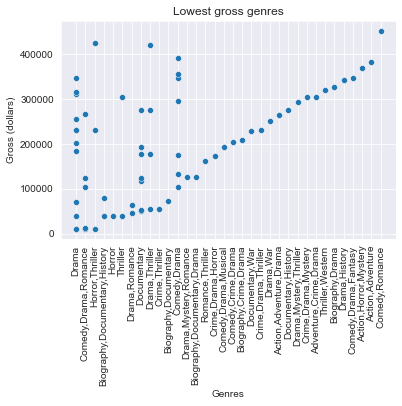

In [50]:
# Using seaborn library, we plot the 50 sample set from the dataset "full_merge" with the lowest revenues
# X axis represents all genres distributed within the 50 sample set.
# Y axis represents the revenues values.
sns.set_style("darkgrid")
sns.scatterplot(data=full_merge_min, x="genres", y="global_sum", );
plt.xticks(rotation=90);
plt.xlabel("Genres");
plt.ylabel("Gross (dollars)");
plt.title("Lowest gross genres");

- Step 7. Obtain statistical information about the highest and lowest gross genres

In [37]:
full_merge_max['global_sum'].describe()

count    7.000000e+01
mean     9.259729e+08
std      1.934951e+08
min      6.827000e+08
25%      7.748000e+08
50%      8.643500e+08
75%      1.053500e+09
max      1.405400e+09
Name: global_sum, dtype: float64

In [38]:
full_merge_max['genres'].value_counts()

Action,Adventure,Sci-Fi          17
Adventure,Animation,Comedy       14
Action,Adventure,Fantasy          7
Action,Adventure,Comedy           6
Action,Adventure,Thriller         5
Adventure,Fantasy                 2
Biography,Documentary,History     1
Horror,Thriller                   1
Action,Adventure,Drama            1
Drama,Sci-Fi,Thriller             1
Action,Adventure,Family           1
Action,Crime,Thriller             1
Horror                            1
Documentary,Drama,Sport           1
Sci-Fi                            1
Action,Drama,Thriller             1
Family                            1
Crime,Drama                       1
Biography,Drama,Music             1
Adventure,Family,Fantasy          1
Action,Thriller                   1
Action,Adventure,Animation        1
Fantasy,Romance                   1
Adventure,Drama,Sport             1
Adventure,Drama,Fantasy           1
Name: genres, dtype: int64

In [39]:
full_merge_min['global_sum'].describe()

count        70.000000
mean     196602.857143
std      124324.671927
min       10800.000000
25%       74575.000000
50%      197200.000000
75%      302550.000000
max      452400.000000
Name: global_sum, dtype: float64

In [40]:
full_merge_min['genres'].value_counts()

Drama                            13
Documentary                       7
Comedy,Drama                      7
Comedy,Drama,Romance              5
Drama,Thriller                    4
Horror,Thriller                   3
Biography,Documentary,History     2
Thriller                          2
Drama,Romance                     2
Thriller,Western                  1
Documentary,History               1
Drama,Mystery,Thriller            1
Crime,Drama,Mystery               1
Adventure,Crime,Drama             1
Comedy,Drama,Fantasy              1
Biography,Drama                   1
Drama,History                     1
Drama,War                         1
Action,Horror,Mystery             1
Action,Adventure                  1
Action,Adventure,Drama            1
Comedy,Crime,Drama                1
Crime,Drama,Thriller              1
Documentary,War                   1
Biography,Crime,Drama             1
Comedy,Drama,Musical              1
Crime,Drama,Horror                1
Romance,Thriller            

- Step 8. Obtain statistics from our "population"

In [41]:
full_merge['global_sum'].describe()

count    1.803000e+03
mean     1.288335e+08
std      2.088373e+08
min      1.080000e+04
25%      1.000000e+07
50%      4.810000e+07
75%      1.489000e+08
max      1.405400e+09
Name: global_sum, dtype: float64

In [42]:
full_merge['genres'].value_counts()

Drama                         128
Comedy,Drama                   74
Adventure,Animation,Comedy     72
Comedy,Drama,Romance           66
Drama,Romance                  62
                             ... 
Action,Comedy,Sport             1
Action,Comedy,Western           1
Drama,Romance,War               1
Adventure,Mystery,Sci-Fi        1
Fantasy,Thriller                1
Name: genres, Length: 264, dtype: int64

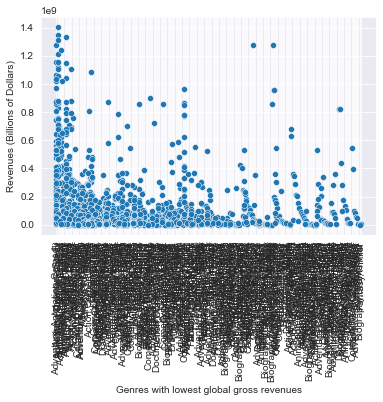

In [43]:
sns.set_style("darkgrid");
sns.scatterplot(data=full_merge, x="genres", y="global_sum", );
plt.xticks(rotation=90);
plt.xlabel("Genres with lowest global gross revenues");
plt.ylabel("Revenues (Billions of Dollars)");

#### What can be conclued for question b?
- For the highest gross genre, ADVENTURE is the most common genre within our 70 samples. Moreover, it is combined with other genres like action, Sci-Fi, Comedy or Thriller.

- For the lowest gross genre, DRAMA is the most common genre within our 70 samples. Moreover, it is combined with other genres like Comedy, Romance or Thriller. Documentary stands also as a low-revenue genre.

### Conclusions for both questions
- There is an almost linear behaviour between genre and revenues. This might be due to a genre's acceptance between viewers, as not all genres are suitable for all audiences.
- On the other hand, the relationship bewteen genre and average ratings is not seen at all, although DOCUMENTARY and DRAMA are most common in high and low ratings, respectively.
- Interestingly, even though DOCUMENTARY is a well-rated genre, its revenues are no match against the ADVENTURE genre. On the other hand, DRAMA is a genre which is both terribly rated and low-revenued.

# Sage's Section
## Relationship between director and revenues

- Does a movie's genre have an impact in mean gross revenues?
- Top 5 genres with most gross revenues (info from 2020 and 2021)

# Neil's Section
## Relationship between ratings and revenues

- Does a movie's genre have an impact in mean gross revenues?
- Top 5 genres with most gross revenues (info from 2020 and 2021)

# Mahan's Section
## Relationship between 

- Does a movie's genre have an impact in mean gross revenues?
- Top 5 genres with most gross revenues (info from 2020 and 2021)